# Исследование рынка компьютерных игр

В нашем распоряжений доступны исторические данные о продаже игр, оценки пользователей и экспертов, жанры игр, платформы и рейтинги игр. Наша задача состоит в поиске закономерностей, патернов или других факторов влияющих на успешность игры. Данное исследование позволит определится с потенциальным игровым хитом, а также спланировать рекламные компании для интернет-магазина компьютерных игр.

Наш план работы будет состоять из нескольких последовательных этапов:

- Изучение общей информации по датасету
- Выполним предобработку данных ради достижения более качественных результатов исследования (замена пропусков, удаление выбросов, добавление новых столбцов)
- Проведем исследовательский анализ показателей, чтобы найти закономерности
- Составим портрет пользователя из разных регионов
- Проверим некоторые гипотезы
- Сделаем итоговый вывод

### Шаг 1: Изучим общую информацию датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import random
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Наш датафрейм состоит из 16715 строк. Для дальнейшего анализа нужно обработать пропуски, привести данные к нужному типу, проверить данные на дубли.

### Шаг 2: Предобработка данных

**Заменим названия столбцов в нашем датафрейме в "питоновский" регистр**

In [5]:
data.columns = map(str.lower, data.columns)

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Заменим пропущенные значения.** Для начала проверим где они встречаются

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Как мы видим пропущенные значение есть в оценках критиков и юзеров и их около 40% от всех данных. Также 269 значений без года выпуска и 2 значения с названием игры. Проверим строчки с названием игры

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Очень похоже, что это одна игра с данными в 2-х строчках. Мы не будем удалять данные, чтобы у нас было более точное представление об проданых копиях игр в разных регионах. 

Также мы не будет заполнять пропуски в столбцах с рейтингом и годом выхода, поскульку такие данные не могут быть заполнены средним или медианным значением.

Из-за того, что мы не можем востановить значения года и названия, мы удалим эти данные.

In [10]:
data = data.dropna(subset=['year_of_release', 'name'])

**Проверим данные на явные и неявные дубликаты**

In [11]:
data['name'].nunique()

11426

In [12]:
data.duplicated().sum()

0

Мы видим, что явных дубликатов он не находит, но при этом у него 11559 уникальных названии игр. Проверим значения на дубли.

In [13]:
data['name'].value_counts()

Need for Speed: Most Wanted                 12
LEGO Marvel Super Heroes                     9
FIFA 14                                      9
Ratatouille                                  9
Monopoly                                     8
                                            ..
Bank Heist                                   1
Jumping Flash! 2                             1
Shape Up                                     1
Ceville                                      1
Yu-Gi-Oh! Monster Capsule Breed & Battle     1
Name: name, Length: 11426, dtype: int64

In [14]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [15]:
data[data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


На примере двух игр мы видим, что по названию мы не можем определить, что это дубль, так как это игры для разной платформы. Также у нас существуют пропуски в данных рейтинга ESRB. Изначально планировалось заменить пропуска рейтингом от другой платформы, однако мы видим разные рейтинги для разных платформ. Следовательно лучше не заполнять данные значения, чтобы не искажать достоверные данные

Чтобы игру можно было защитать за дубль, мы можем объеденить несколько столбцов с категорийными данными и проверить их на дубли

In [16]:
data['dupl'] = data['name'] + data['platform'] + data['year_of_release'].astype('str')

In [17]:
data['dupl'].value_counts()

Madden NFL 13PS32012.0                                    2
Playmobil PiratesDS2009.0                                 1
Space ChimpsPS22008.0                                     1
Atlantis26001981.0                                        1
Midnight Club 3: DUB Edition RemixXB2006.0                1
                                                         ..
Digger SimulatorPC2011.0                                  1
Saint Seiya: Sanctuary BattlePS32011.0                    1
Perfect DarkN642000.0                                     1
WWE SmackDown vs Raw 2008DS2007.0                         1
TOCA Race Driver 2: Ultimate Racing SimulatorPSP2005.0    1
Name: dupl, Length: 16443, dtype: int64

In [18]:
data[data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,dupl
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,Madden NFL 13X3602012.0
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,Madden NFL 13PS32012.0
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,Madden NFL 13Wii2012.0
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,Madden NFL 13PSV2012.0
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,Madden NFL 13WiiU2012.0
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,Madden NFL 13PS32012.0


Одна игра попала в категорию дублей. Как мы видим строка с индексом 604 и 16230 являются одной игрой. Конечно одна строка не испортила бы итоговый вывод, но раз мы нашли данную проблему, то устраним дубль. Удалив строку 16230 мы потеряем 0.01 мн проданых копии в EU сегменте. Значит прибавим их в строку 604

In [19]:
data.loc[[604],'eu_sales'] = 0.23
data.loc[[604]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,dupl
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E,Madden NFL 13PS32012.0


In [20]:
data = data.drop(index=[16230]).reset_index(drop=True)

Столбец dupl больше нам не нужен и мы можем его удалить.

In [21]:
data.drop('dupl', axis= 1 , inplace= True) 

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Перепроверяем данные таблицы. Мы удалили дубликат, а также пустые значения в столбцах с именем и годом выпуска

**Заменим типы столбцов**

Можно заметить, что данные в столбце year_of_release типа float64, а также user_score типа object. 
- year_of_release мы сделаем данные типа int
- Разберемся с данными в user_score и выясним почему данные типа object

In [23]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [24]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Проверим что за данные "tbd"

In [25]:
data[data['user_score'] == 'tbd'].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
716,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
810,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
870,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1036,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1037,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


Аббревиатура tbd означает, что рейтинг пользователей еще не определен. Также мы не видим закономерности в этих данных. Так как информацию о рейтинге хотелось бы иметь полностью, а уточнить причину таких данных мы не можем, мы заменим эти данные на NAN, чтобы была возможность анализировать рейтинг. Можно было бы заменить tbd на средний рейтинг в категории или рейтигом критиков, но это не совсем правильно и может повлиять на дальнейшее исследование. Лучше будем анализировать по достоверным данным пользователей, чтобы не искажать выводы

In [26]:
data['user_score'].replace('tbd', np.nan, inplace=True)
data['user_score'] = data['user_score'].astype('float')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Проверим данные по рейтингу.

In [28]:
data['rating'].value_counts()

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Как мы видим существуют 4 основный рейтинга игры. Поскольку рейтингов EC, K-A, AO, RP очень малое количество, то удалим их из наших данных

In [29]:
rating_drop = ['EC', 'K-A', 'AO', 'RP']
for rating in rating_drop:
    data = data[data['rating'] != rating]
    
data.reset_index(drop=True)
data['rating'].value_counts()

E       3920
T       2905
M       1536
E10+    1393
Name: rating, dtype: int64

Дубликаты устранили, тип данных заменили, пропуски в данных удалили, так как не было возможности их заполнить. Теперь добавим столбец с общей информацией по всем проданым копиям

In [30]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']

### Шаг 3: Исследовательский анализ данных

**Проверим сколько игр выпускалось в разные годы**

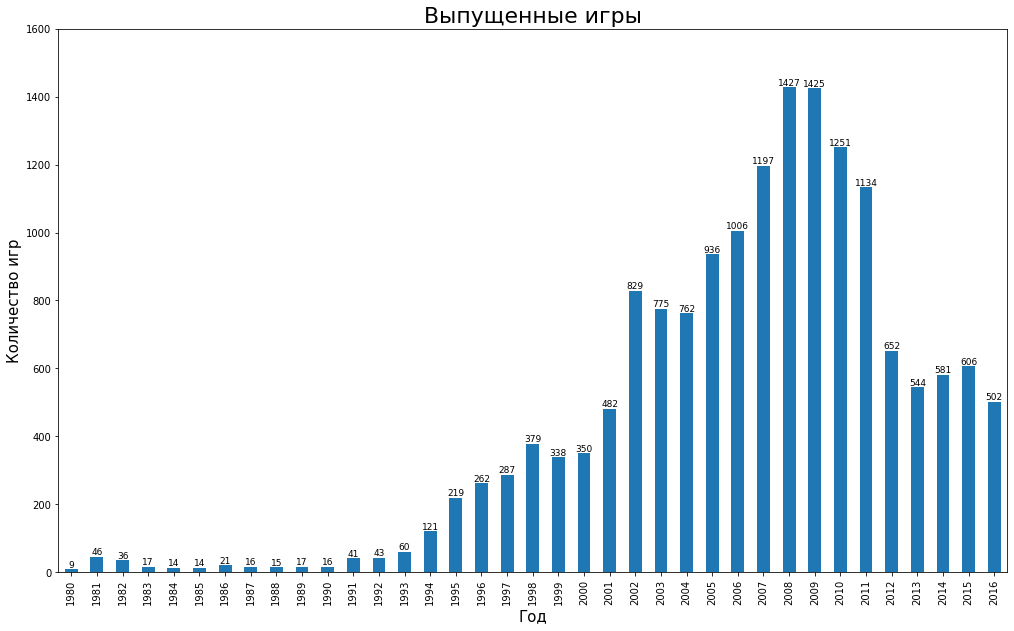

In [31]:
data_year = data.groupby('year_of_release').size()

plt.figure(figsize=(17,10))
data_year.plot(kind='bar', width=.5)

for i, val in enumerate(data_year.values):
    plt.text(i, val, int(val),
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict={'fontweight':500, 'size':9},
             )

plt.title('Выпущенные игры', fontsize=22)
plt.xlabel('Год',fontsize=15)
plt.ylabel('Количество игр',fontsize=15)
plt.ylim(0, 1600)
plt.show()

Как мы видим найбольшее количество игр выпускалось в 2008-2009 году. После этого количество выпускаемых игр стало сокращаться и уже с 2012 года можно увидеть, что в среднем выпускалось по 550 игр.

In [32]:
data['year_of_release'].describe()

count    16430.000000
mean      2006.486427
std          5.875835
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Для того, чтобы нам продумывать стратегию рекламы нам не обязательно использовать все данные, тем более, что старые игры не относятся к современным тенденциям. Поскольку половина всех данных лежит на отметке 2007 года, то за дальнейшую основу возьмем 10 лет.

**Проверим на каких платформах найбольшее количество игр**

In [33]:
data_platform = data.pivot_table(index='platform', values='year_of_release', aggfunc=('min','max','count'))
data_platform['game_release_duration'] = data_platform['max'] - data_platform['min'] + 1

Построим график, чтобы посмотреть сколько лет выпускались игры на разные платформы

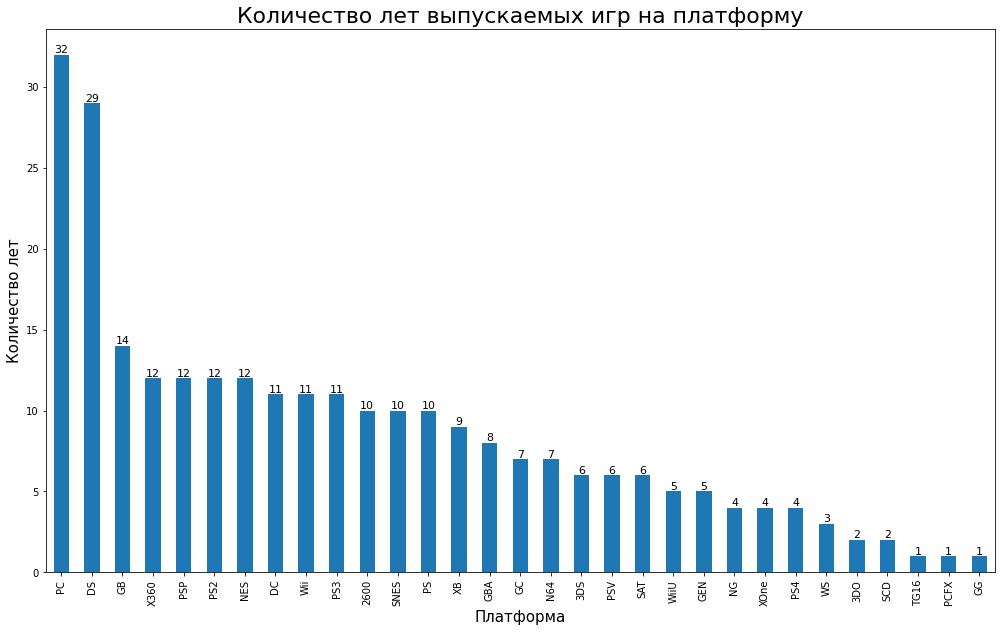

In [34]:
plt.figure(figsize=(17,10))
data_platform['game_release_duration'].sort_values(ascending=False).plot(kind='bar')

platform_count = data_platform['game_release_duration'].sort_values(ascending=False)

for i, val in enumerate(platform_count.values):
    plt.text(i, val, int(val),
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict={'size':11},
             )

plt.title('Количество лет выпускаемых игр на платформу', fontsize=22)
plt.xlabel('Платформа',fontsize=15)
plt.ylabel('Количество лет',fontsize=15);

Как мы видим самыми долгими платформами являются PC и DS. На них игры выпускаются уже 30 лет.

Теперь давайте посмотрим на то сколько игр выпускалось на данные платформы

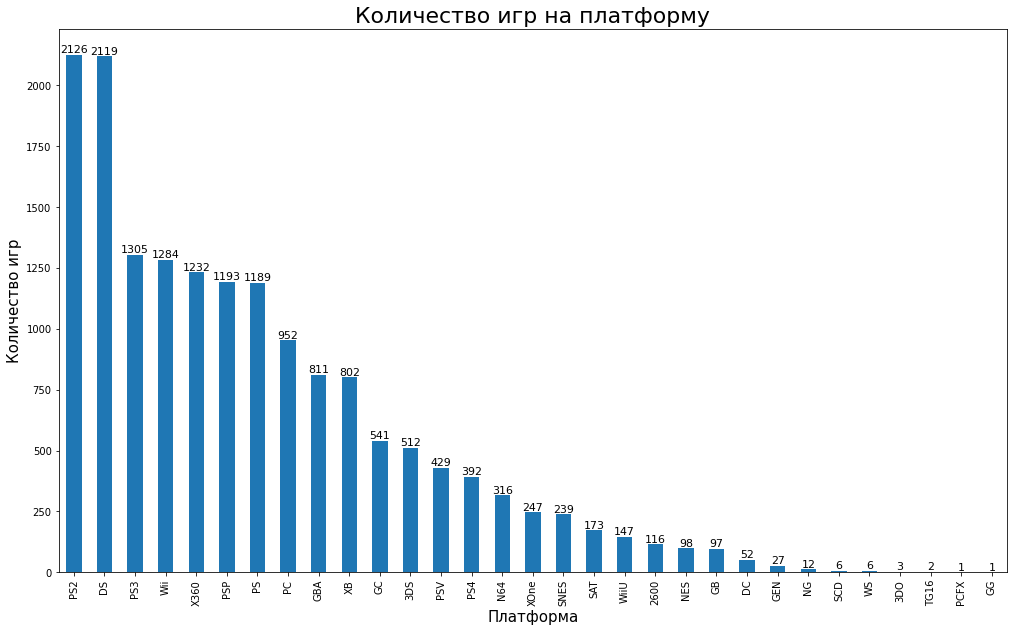

In [35]:
plt.figure(figsize=(17,10))
data_platform['count'].sort_values(ascending=False).plot(kind='bar')

platform_count = data_platform['count'].sort_values(ascending=False)

for i, val in enumerate(platform_count.values):
    plt.text(i, val, int(val),
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict={ 'size':11},
             )
    
plt.title('Количество игр на платформу', fontsize=22)
plt.xlabel('Платформа',fontsize=15)
plt.ylabel('Количество игр',fontsize=15);

Лидерами являются различные версии PS, PC, DS, Wii и X360. Можем посмотерть сколько игр выпускалось на них в разные года

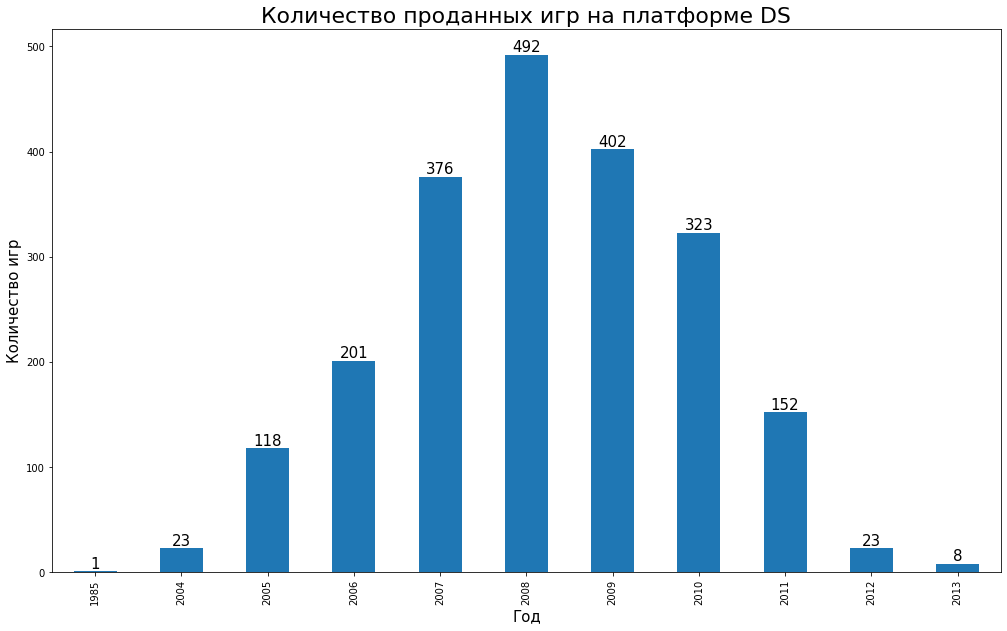

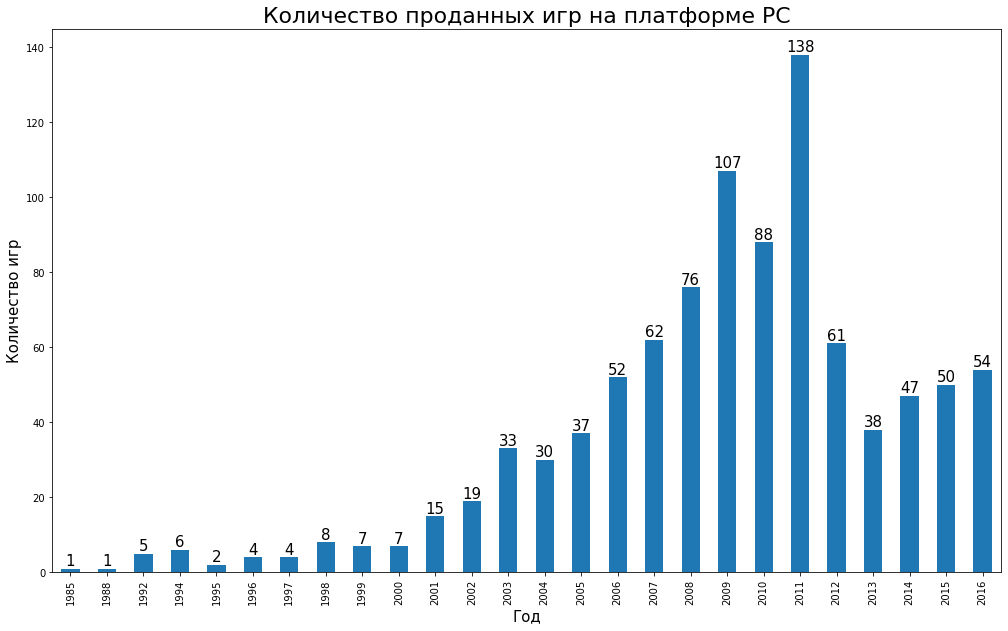

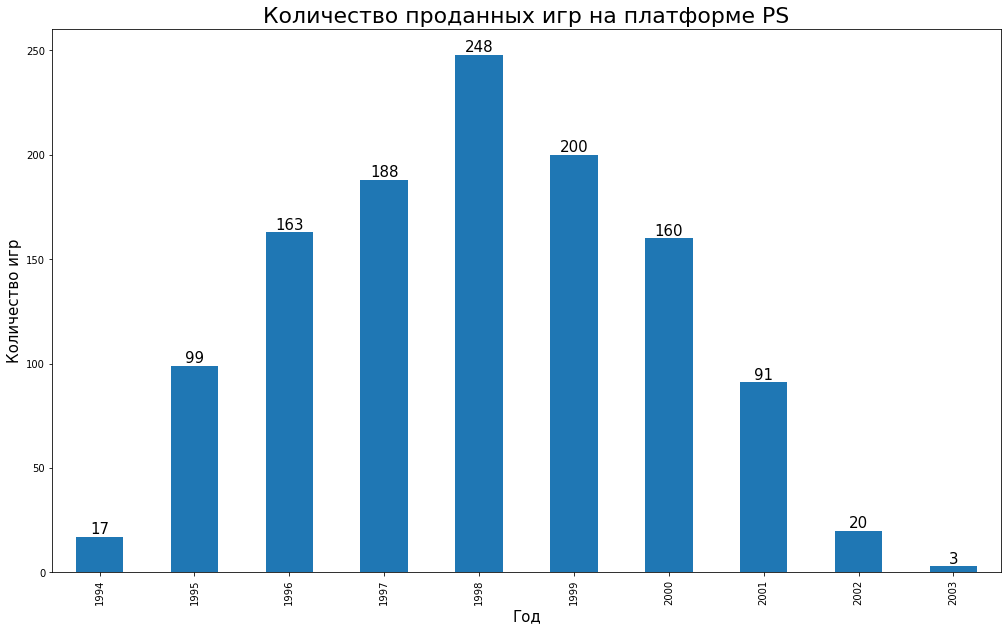

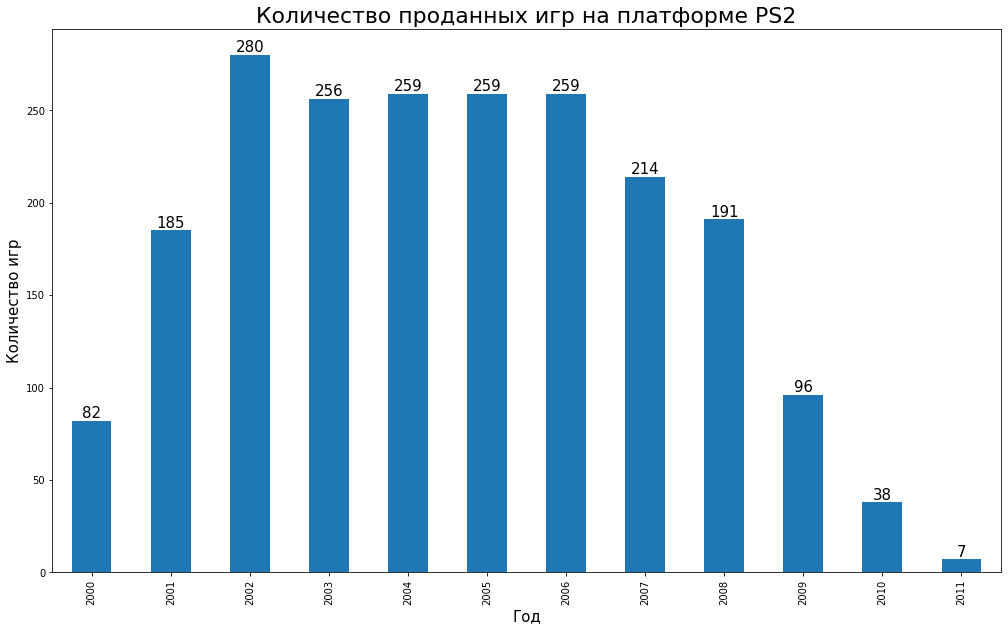

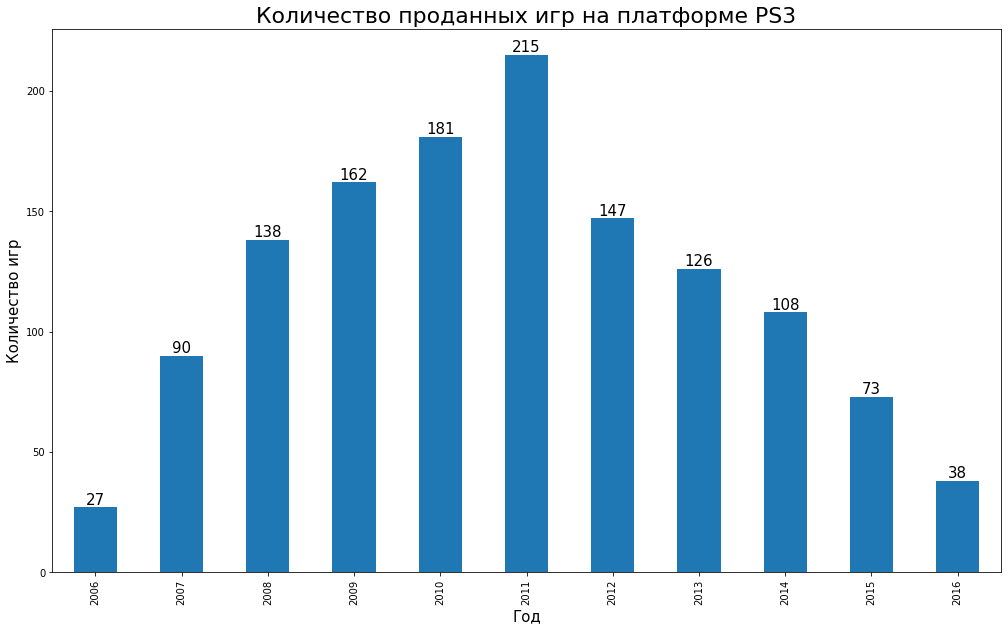

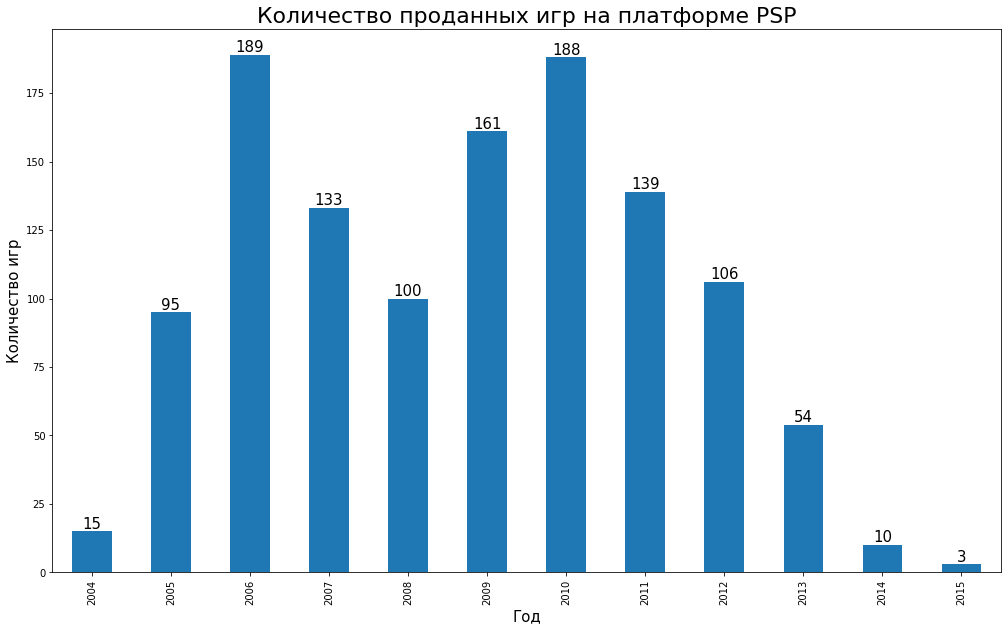

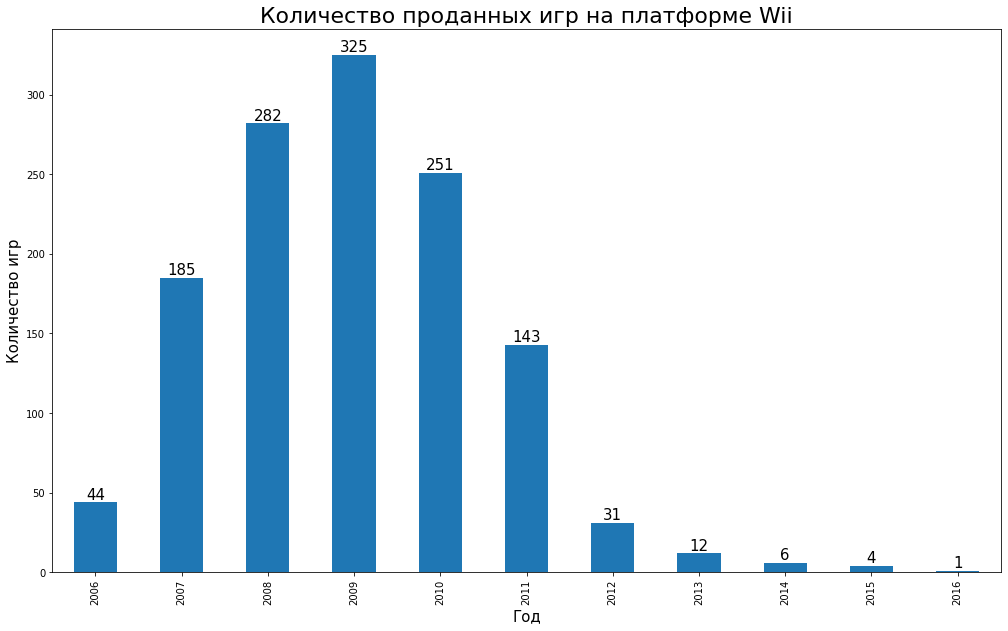

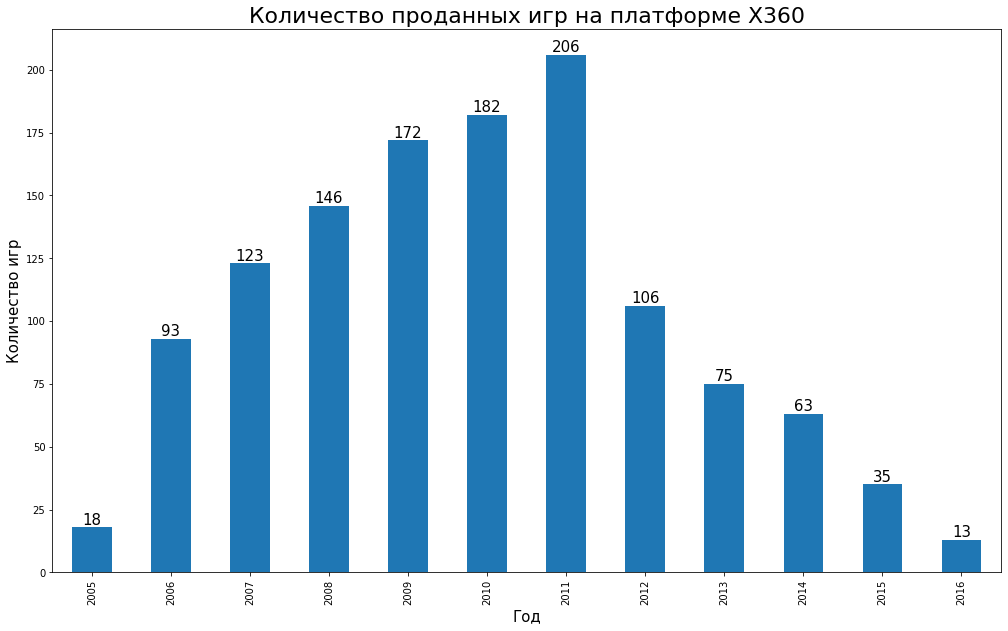

In [36]:
game_platform = data_platform.query('count > 900').reset_index()
game_platform = game_platform['platform']
game_platform

for col in game_platform:
    graf = data[data['platform'] == col]
    graf.groupby('year_of_release')['platform'].count().plot(kind='bar',
                                                             figsize=(17,10))
    
    platform_count =  graf.groupby('year_of_release')['platform'].count()
    
    for i, val in enumerate(platform_count.values):
        plt.text(i, val, int(val),
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict={'size':15},
             )
    plt.title(f'Количество проданных игр на платформе {col}', fontsize=22)
    plt.xlabel('Год',fontsize=15)
    plt.ylabel('Количество игр',fontsize=15)
    plt.show()
    

Как можно заметить игры на платформы выходят 10 лет и на протяжении 5 лет количество выпуска игр растет, для платформ с количеством выпущенных игр более 900, а далее начинает падать. Исключением является PC

Давайте посмотрим на платформы с самыми последними играми

In [37]:
data_platform = data_platform.rename(columns = {'count' : 'number_of_games',
                                               'max' : 'last_game_year',
                                               'min' : 'first_game_year'})
data_platform.sort_values(by='last_game_year',ascending=False)

,number_of_games,last_game_year,first_game_year,game_release_duration
platform,,,,
XOne,247,2016,2013,4
3DS,512,2016,2011,6
X360,1232,2016,2005,12
WiiU,147,2016,2012,5
Wii,1284,2016,2006,11
PSV,429,2016,2011,6
PC,952,2016,1985,32
PS4,392,2016,2013,4
PS3,1305,2016,2006,11


На примере разных версии PS можно заметить, что новые модели выходят раз в 5-7 лет, а сами игры на них выходят на протяжении 10 лет, что было подтверждено графиками.

Исходя из предудущих данных, для дальнейшего анализа, нам нужны платформы которые подходят по следующим условиям:
- Игры, на текущий момент, должны выпускаться
- Платформа должна быть не старше 10 лет
- PC должна попадать в нашу подборку

В нашем случае актуальными платформами являются: XOne, 3DS, WiiU, PSV, PC и PS4

**Отберем нужные данные из нашего датафрейма**

In [38]:
data_new = data[data['platform'].isin(['XOne', '3DS', 'WiiU', 'PSV', 'PC', 'PS4'])]
data_new.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
2,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,11.74
3,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,10.94
...,...,...,...,...,...,...,...,...,...,...,...,...
2674,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2675,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01
2676,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2677,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Хоть мы и удалили 80% данных, зато это самые последние данные и они актуальны для построения рекламной стратегии за 2017 год

Давайте еще раз посмотрим на данные по продажам данных платформ

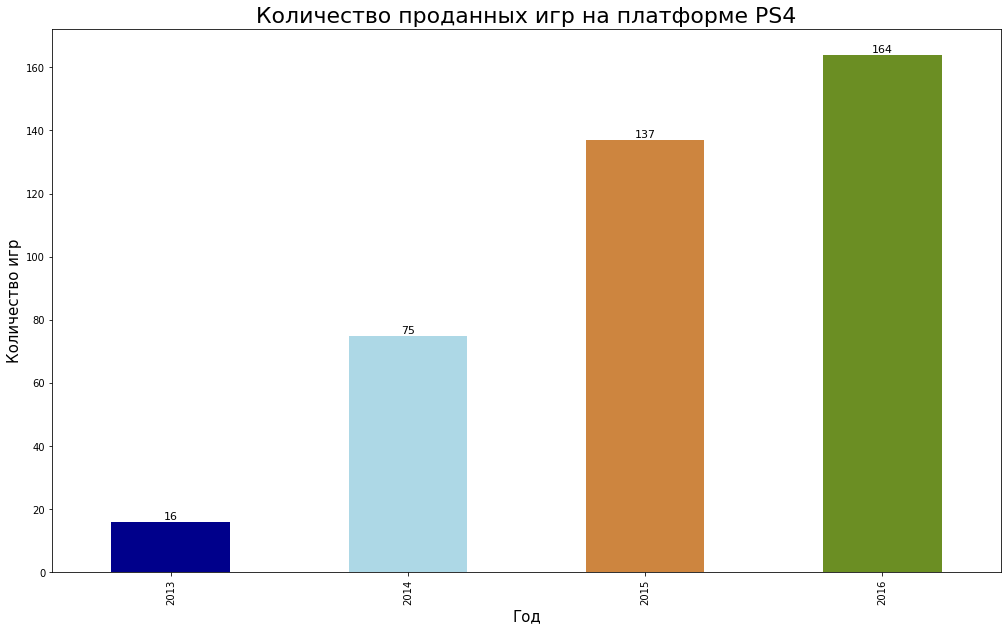

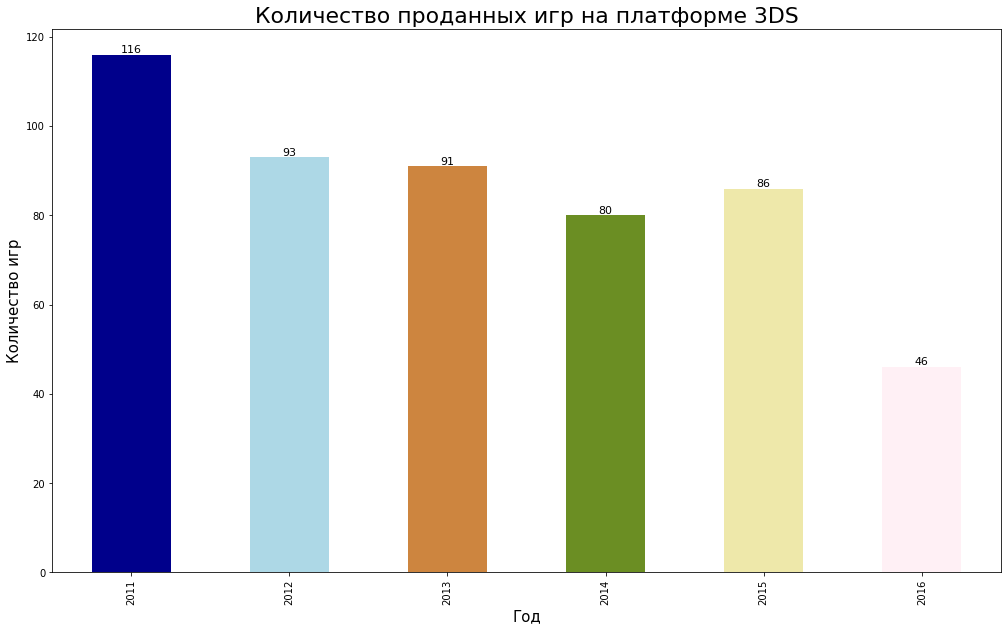

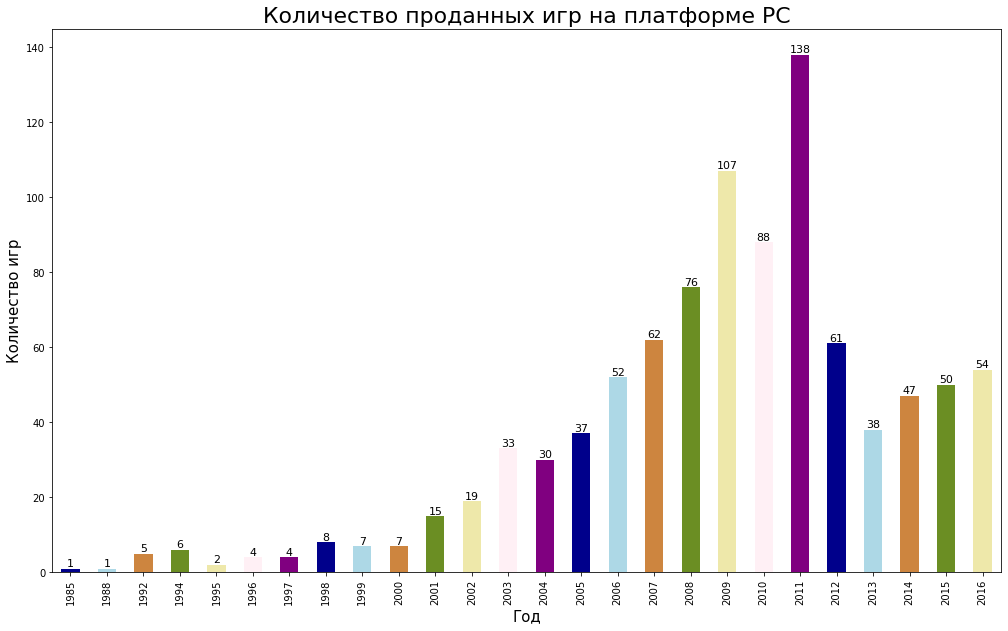

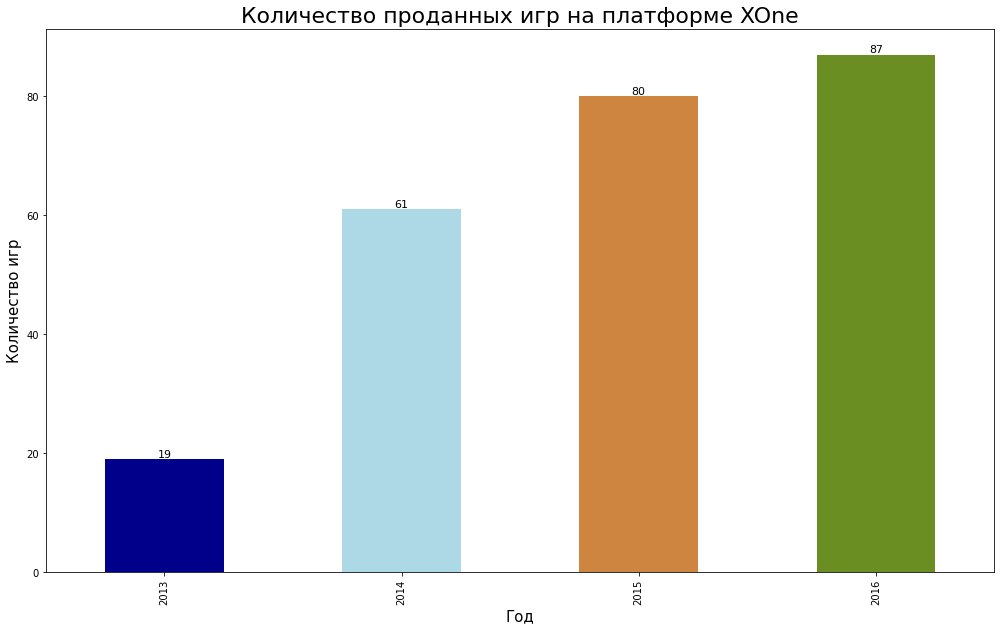

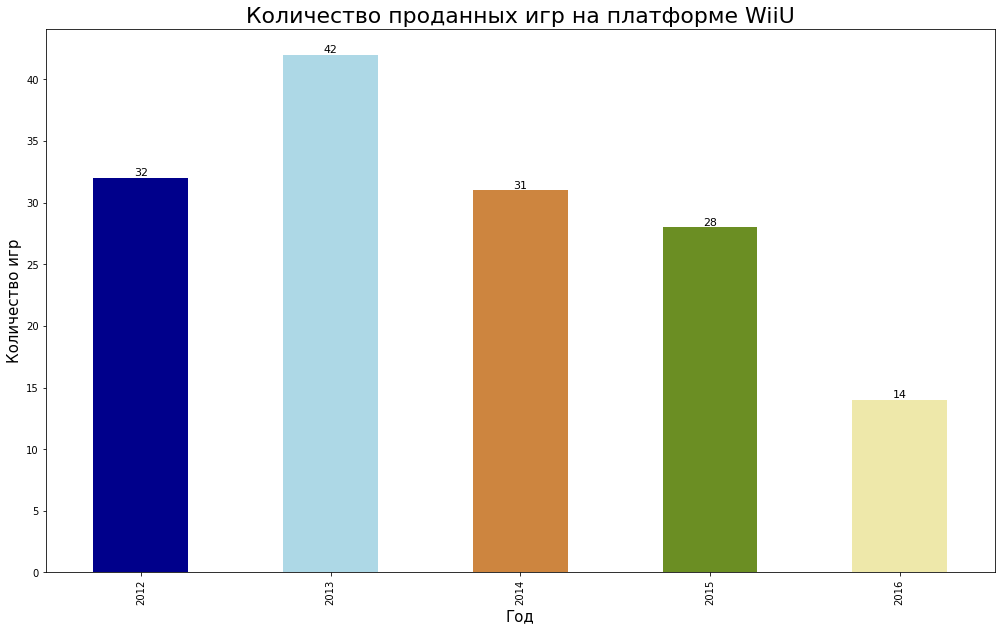

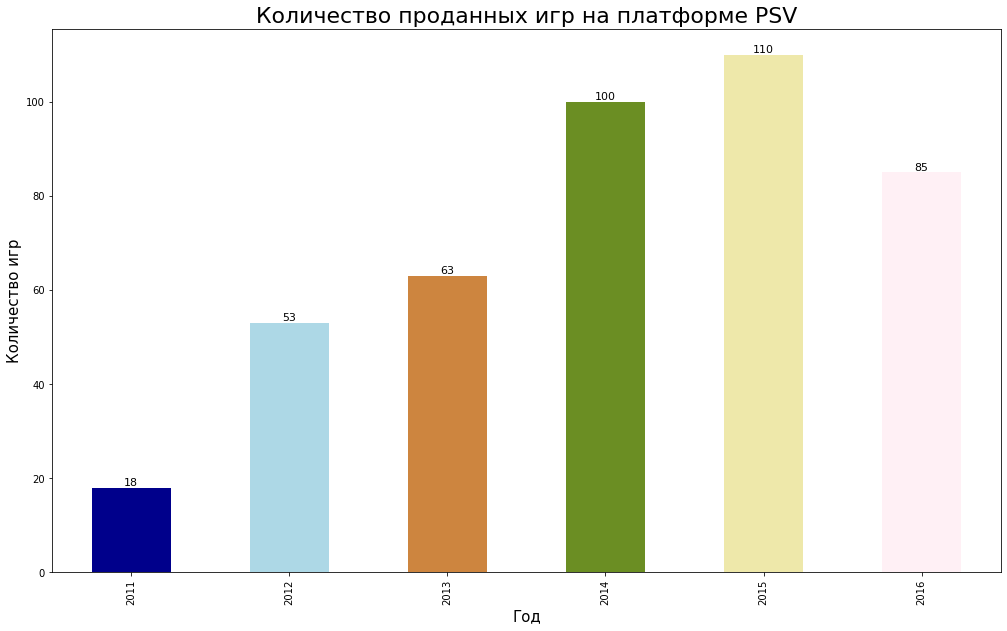

In [39]:
game_platform_new = data_new['platform'].unique()

n = data_new['platform'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

for col in game_platform_new:
    graf = data_new[data_new['platform'] == col]
    graf.groupby('year_of_release')['platform'].count().plot(kind='bar',
                                                             figsize=(17,10),
                                                             color = c)
    
    platform_count =  graf.groupby('year_of_release')['platform'].count()
    
    for i, val in enumerate(platform_count.values):
        plt.text(i, val, int(val),
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict={'size':11},
             )
        
    plt.title(f'Количество проданных игр на платформе {col}', fontsize=22)
    plt.xlabel('Год',fontsize=15)
    plt.ylabel('Количество игр',fontsize=15)
    plt.show()

Как мы видим в последние 4 года идет рост количества игр на приставки нового поколоения (PS4, XOne), а также "ПК БОЯРЕ" тоже получают все больше новинок, хотя недовольны тем, что количество проектов заметно упало относительно начала 2010

В предыдущем этапе мы не удаляли игры старше определенного периода, чтобы увидеть динамику. Поскольку нас интересуют только последние тенденции, то оставилм для анализа игра последних 3-х лет

In [40]:
data_new = data_new[data_new['year_of_release'] >= 2014]
data_new = data_new.reset_index(drop=True)
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,10.94
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...
1330,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1331,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1332,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1333,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


С очисткой данных разобрались, теперь **проанализируем общие продажи для разных платформ**

Построим диаграмму "ящик с усами" для каждой платформы

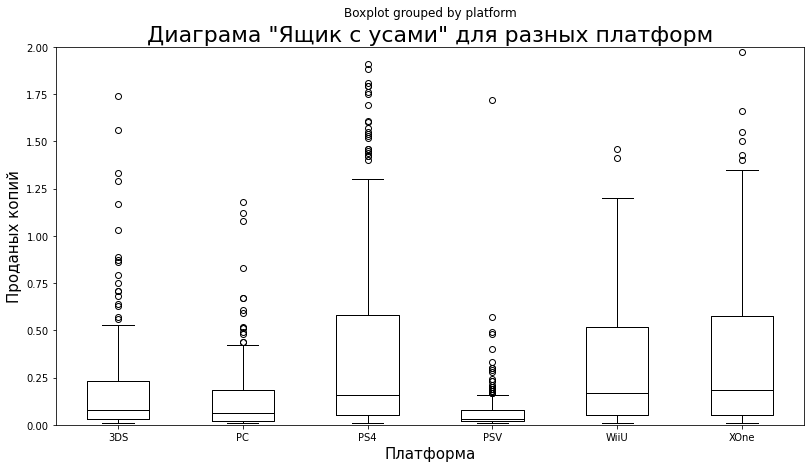

In [41]:
data_new.boxplot(column=['total_sales'], by='platform', grid= False , color='black', figsize=(13,7)) 
plt.title('Диаграма "Ящик с усами" для разных платформ', fontsize=22)
plt.xlabel('Платформа',fontsize=15)
plt.ylabel('Проданых копий',fontsize=15)
plt.ylim(0,2)
plt.show()

Чтобы лучше разглядеть сами "боксы" мы установили лимит в 2 мн копии. Как мы видим, самыми успешными платформами являются приставки PS4 и XOne. Для PC продажи выше 0,5 мн копии уже считается выбросом. Возможно это связано с количеством выпускаемых игр. Проверим средние значения по каждой платформе

In [42]:
data_new.groupby('platform')['total_sales'].agg({'sum', 'median', 'count', 'mean'}).sort_values(by='mean', ascending=False)

,sum,median,mean,count
platform,,,,
PS4,243.67,0.160,0.648059,376
XOne,127.84,0.185,0.560702,228
WiiU,39.82,0.170,0.545479,73
3DS,83.00,0.080,0.391509,212
PC,25.20,0.060,0.166887,151
PSV,20.59,0.030,0.069797,295


Как мы видим, тренды захватили игры на консоли и хоть PS4 в среднем имеет большие продажи, однако медианное значение выше для XOne.

Давайте проверим как влияют отзывы критиков и обычный пользователей на рейтинги данных платформ. Проверим корреляцию рейтингов для разных платформ

In [43]:
for plat in data_new['platform'].unique():
    data_plat = data_new[data_new['platform'] == plat]
    corr = data_plat['total_sales'].corr(data_plat['user_score'])
    print(f'Коеффициент корреляции для платформы {plat} и продажами составляет {corr}')

Коеффициент корреляции для платформы PS4 и продажами составляет -0.039364345213287334
Коеффициент корреляции для платформы 3DS и продажами составляет 0.21461640035191556
Коеффициент корреляции для платформы XOne и продажами составляет -0.07039252638189664
Коеффициент корреляции для платформы WiiU и продажами составляет 0.40731088466102705
Коеффициент корреляции для платформы PC и продажами составляет -0.0711521868399166
Коеффициент корреляции для платформы PSV и продажами составляет -0.12663266741292611


Как мы видими рейтинги не сильно влияют на продажи для наших платформ. Можно выделить только 2 платформы - это 3DS и WIIU. Там коеффициент больше, чем у других платформ. Давайте посмотрим на диаграмму рассевания для платформы WiiU и PS4, поскольну у них максимальное и близкое к нулю значение корреляции

In [44]:
data_ps4 = data_new[data_new['platform'] == 'PS4']

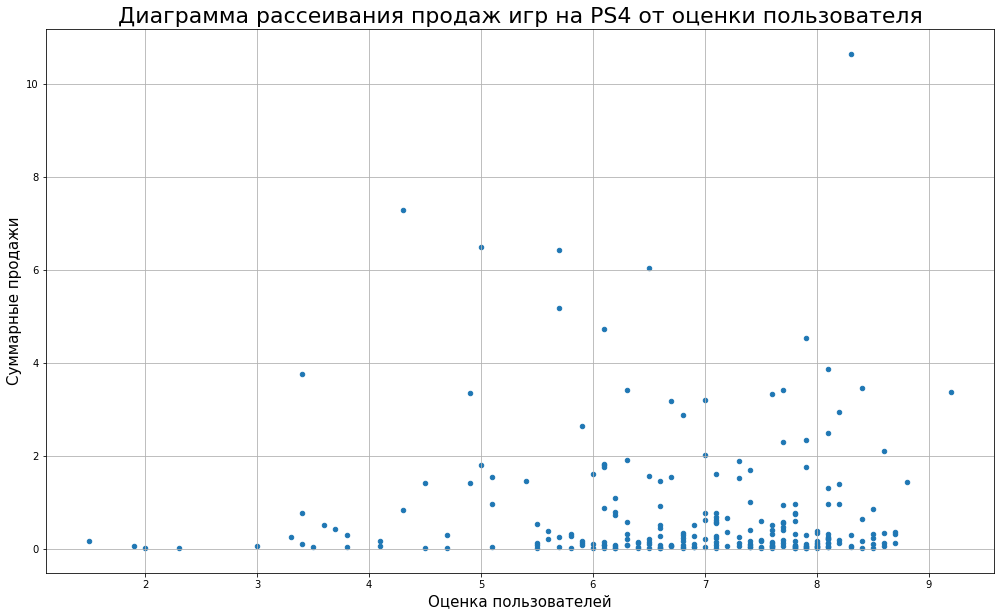

In [45]:
data_ps4.plot(kind='scatter',
              x='user_score',
              y='total_sales',
              grid=True, 
              figsize=(17,10),
              title='User Rating Impact',
              alpha=1);

plt.title('Диаграмма рассеивания продаж игр на PS4 от оценки пользователя', fontsize=22)
plt.xlabel('Оценка пользователей',fontsize=15)
plt.ylabel('Суммарные продажи',fontsize=15)
plt.show()

Дейсвительно по графику видно, что даже игра с рейтингом 4 может продаться в размере 7,5 копии.

Теперь посмотрим на WiiU

In [46]:
data_wiiu = data_new[data_new['platform'] == 'WiiU']

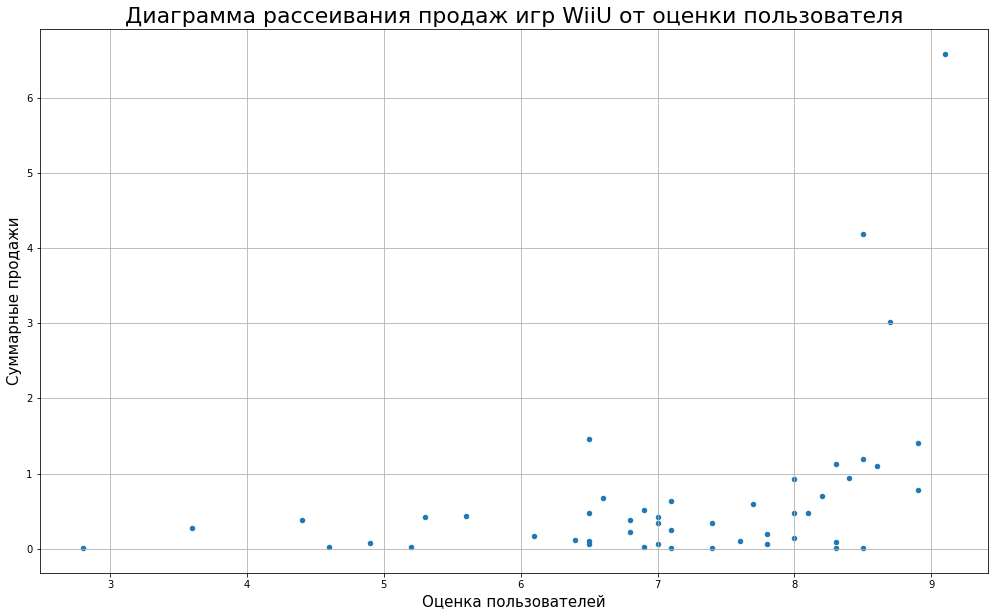

In [47]:
data_wiiu.plot(kind='scatter',
               x='user_score',
               y='total_sales',
               grid=True, 
               figsize=(17,10),
               title='User Rating Impact',
               alpha=1);

plt.title('Диаграмма рассеивания продаж игр WiiU от оценки пользователя', fontsize=22)
plt.xlabel('Оценка пользователей',fontsize=15)
plt.ylabel('Суммарные продажи',fontsize=15)
plt.show()

Тут уже лучше наблюдает рост продаж, особено для высоко оцененных игр.

Теперь проверим критиков

In [48]:
for plat in data_new['platform'].unique():
    data_plat = data_new[data_new['platform'] == plat]
    corr = data_plat['total_sales'].corr(data_plat['critic_score'])
    print(f'Коеффициент корреляции для платформы {plat} и продажами составляет {corr}')

Коеффициент корреляции для платформы PS4 и продажами составляет 0.4021203477635433
Коеффициент корреляции для платформы 3DS и продажами составляет 0.3117520311601232
Коеффициент корреляции для платформы XOne и продажами составляет 0.4286498963779636
Коеффициент корреляции для платформы WiiU и продажами составляет 0.3693372067143287
Коеффициент корреляции для платформы PC и продажами составляет 0.17382268167175324
Коеффициент корреляции для платформы PSV и продажами составляет 0.051543070418280504


Тут уже лучше видна зависимость. Думаю, что на графиках мы это тоже увидим. Ради эксперимента возьмем XOne как самую большую корреляцию

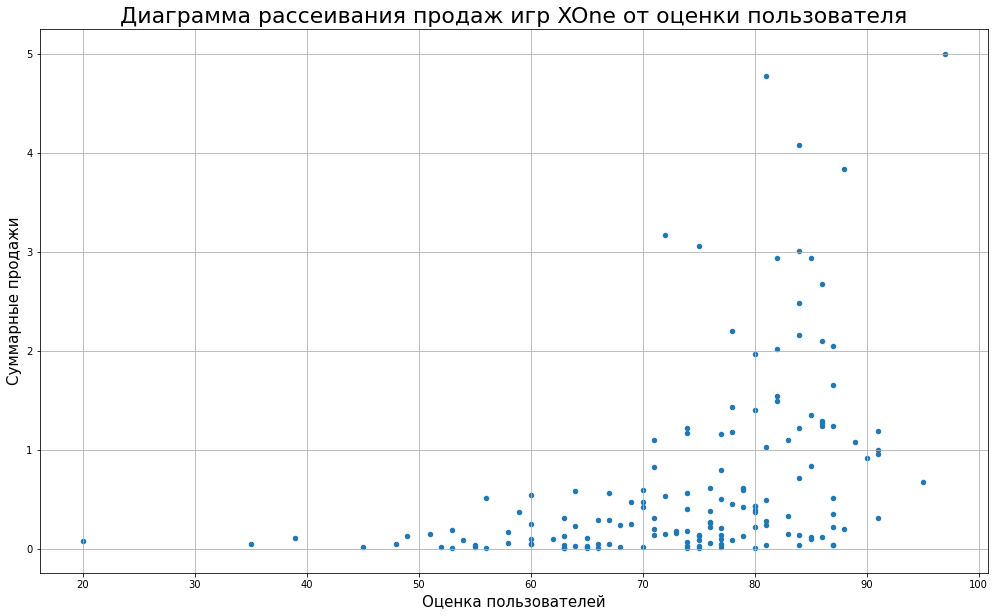

In [49]:
data_xone = data_new[data_new['platform'] == 'XOne']
data_xone.plot(kind='scatter',
               x='critic_score',
               y='total_sales',
               grid=True, 
               figsize=(17,10),
               title='User Rating Impact',
               alpha=1);

plt.title('Диаграмма рассеивания продаж игр XOne от оценки пользователя', fontsize=22)
plt.xlabel('Оценка пользователей',fontsize=15)
plt.ylabel('Суммарные продажи',fontsize=15)
plt.show()

На основании 2-х высоких коеффициентов корреляции можно сделать вывод, что рейтинги до 70 баллов у критиков и 7 баллов у обычных пользователей не сильно влияют на продажи, а вот при рейтингах выше уже есть прогресс в сторону продаж. Но обращать внимание лучше на критиков, чем на пользователей, так как там коеффициент корреляции выше. Однако не стоит забывать, что на продажи могут влиять и другие факторы. Например маркетинговая компания, целевая аудитория игры, стоимость игры и т.д.

**Проверим игры по жанрам и их продажам**

In [50]:
data_genre = data_new.groupby('genre')['total_sales'].agg({'mean', 'median', 'count'}).sort_values(by='mean', ascending=False)
data_genre

,median,mean,count
genre,,,
Shooter,0.490,1.280101,99
Sports,0.185,0.649135,104
Fighting,0.120,0.586053,38
Platform,0.140,0.468788,33
Role-Playing,0.100,0.451230,187
Racing,0.080,0.420377,53
Action,0.080,0.299717,495
Simulation,0.095,0.288250,40
Misc,0.090,0.267528,89


Мы видим, что игры жанра Shooter, Sports и Fighting имеют высокие средние продажи, а вот игры Adventure, Strategy и Puzzle имеют меньше поклонников. Также стоит отметить, что найбольшее количество игр в жанре Action

### Шаг 4: Составление портрета пользователей из разных стран

Первое что мы хотим проверить - это **популярные платформы** за последнее время для каждого региона. Выведем объемы и проценты в сводной

In [51]:
table1 = data_new.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
for reg in table1.columns:
    table1[reg] = (table1[reg]/table1[reg].sum()).apply(lambda x: '{:.2f}%'.format(100*x))

table1

,eu_sales,jp_sales,na_sales
platform,,,
3DS,7.10%,54.33%,9.77%
PC,7.91%,0.00%,3.12%
PS4,57.27%,18.45%,42.57%
PSV,1.55%,17.86%,1.09%
WiiU,5.79%,8.98%,8.36%
XOne,20.37%,0.39%,35.09%


Выведем информацию по долям в виде круговой диаграммы, для более наглядной визуализации

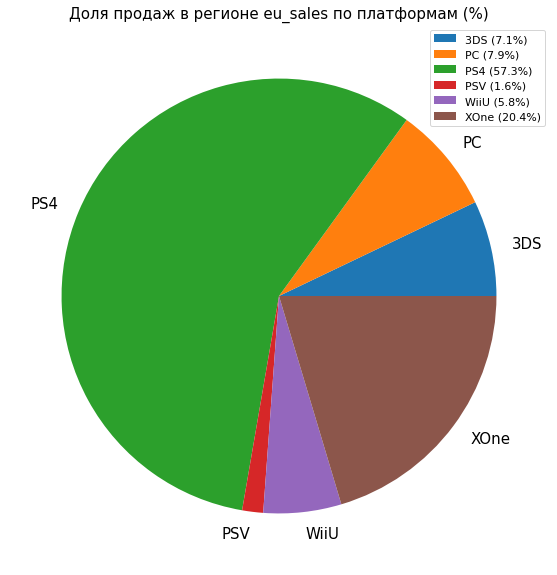

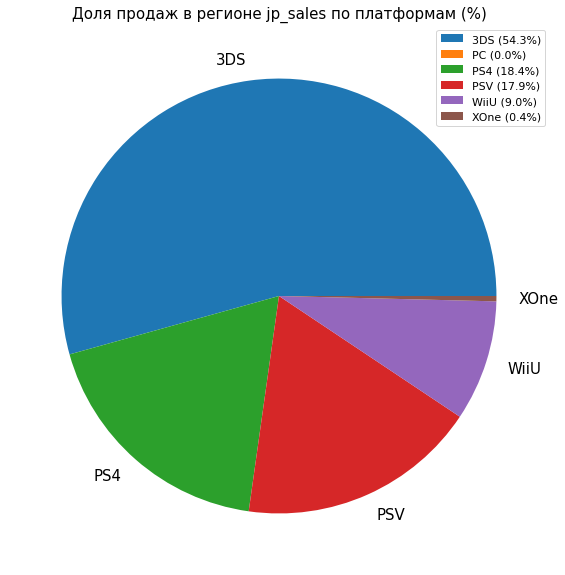

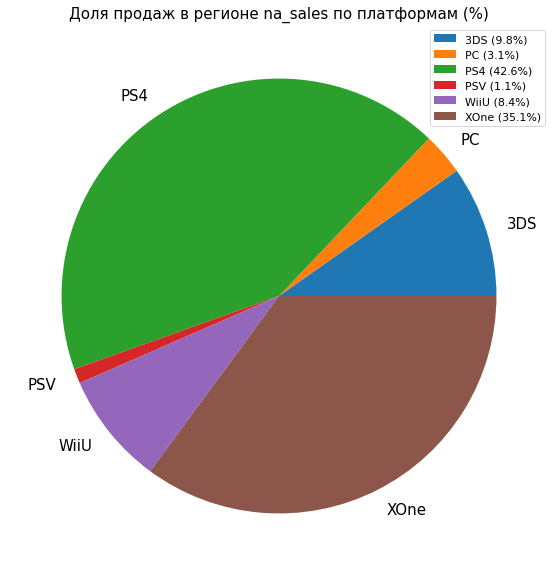

In [52]:
table2 = data_new.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
region = pd.Series(table2.columns)
for reg in region:
    data_names = pd.Series(table2.index)
    data_val = pd.Series(table2[reg])

    total = sum(data_val)
    labels = [f"{n} ({v/total:.1%})" for n,v in zip(data_names, data_val)]

    fig = plt.figure(figsize=(9,9))

    plt.title(f'Доля продаж в регионе {reg} по платформам (%)', fontsize=15)

    table2[reg].plot(kind='pie',
                           figsize =(10,10),
                           fontsize=15)
    plt.legend(loc='best', labels=labels, fontsize=11)
    plt.ylabel('')

Можно заметить, что рынок Японии сильно отличается от рынка Европы и Северной Америки. В Японии нет платформы, которая составит конкуренцию 3DS. Для рынка Европы PS4 является лидером, а вот в Северной Америке нет сильных отличий от продаж для PS4 и XOne

Давайте посмотрим на **жанры**

In [53]:
table3 = data_new.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
for reg in table3.columns:
    table3[reg] = (table3[reg]/table3[reg].sum()).apply(lambda x: '{:.2f}%'.format(100*x))

table3

,eu_sales,jp_sales,na_sales
genre,,,
Action,27.96%,30.35%,25.97%
Adventure,2.18%,3.91%,1.69%
Fighting,2.66%,6.15%,4.85%
Misc,3.69%,6.35%,4.43%
Platform,2.80%,3.28%,2.78%
Puzzle,0.23%,1.09%,0.28%
Racing,5.69%,2.01%,3.33%
Role-Playing,11.42%,35.24%,12.84%
Shooter,24.76%,5.17%,28.62%


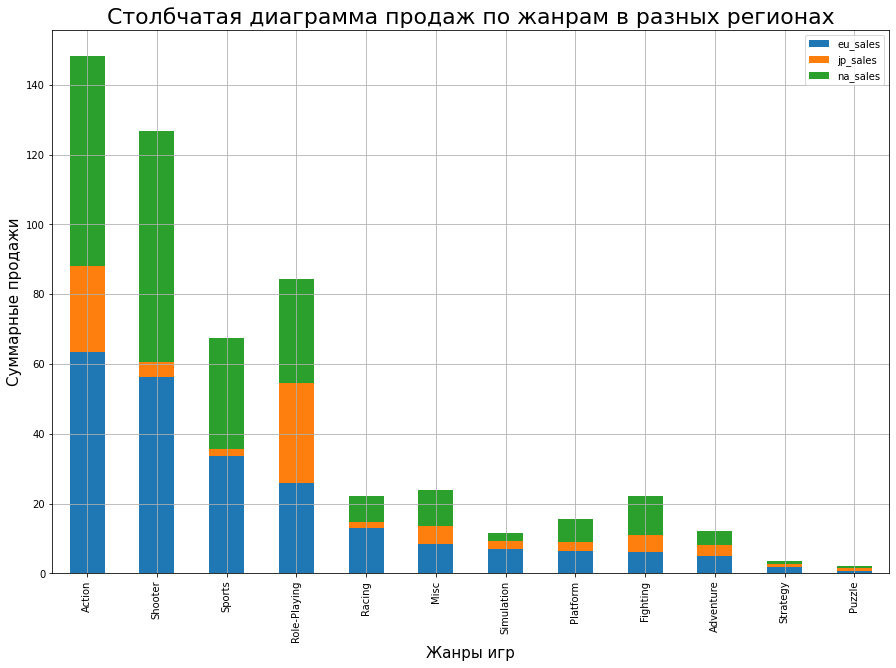

In [54]:
table3 = data_new.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
table3.sort_values(by='eu_sales', ascending=False).plot(kind='bar', stacked= True, figsize=(15,10), grid= True)

plt.title('Столбчатая диаграмма продаж по жанрам в разных регионах', fontsize=22)
plt.xlabel('Жанры игр',fontsize=15)
plt.ylabel('Суммарные продажи',fontsize=15)
plt.show()

И опять, рынок Японии отличается от очень похожего рынка Северной Америки и Европы. Для Японии характерны продажи игр жанра Action и RPG. Хоть эти игры и популярны в других странах, но шутеры и спортивные игры для Японии менее популярны, чем для Европы и Северной Америки

Хоть и не популярные жанры занимают меленькую долю среди всех игр, но давайте глянем на эти данные под другим углом.
Выведем данные по долям конкретного жанра, и сколько он занимает долю в регионе, чтобы лучше разглядеть жанры с небольшими продажами

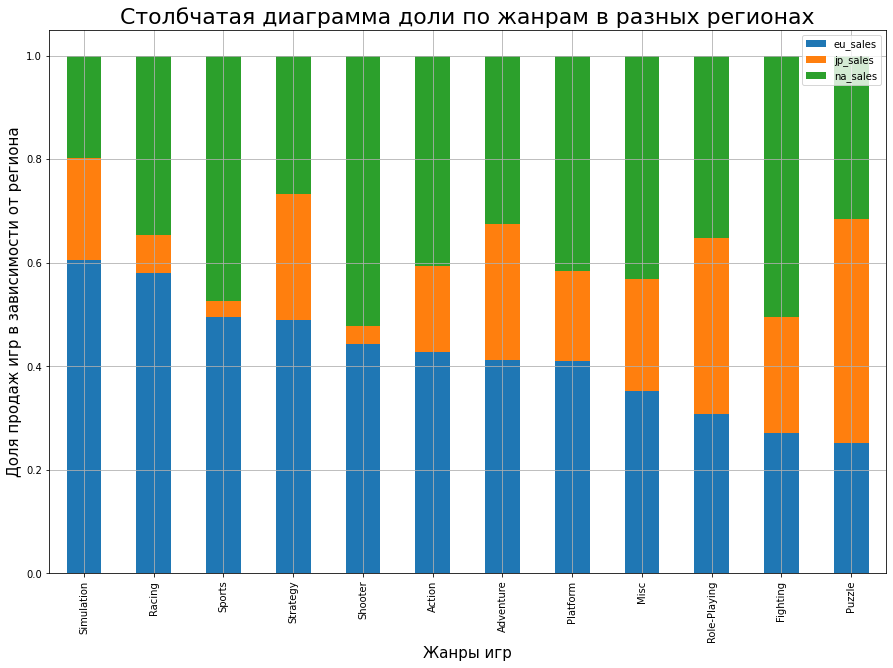

In [55]:
table3 = data_new.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
table3['total'] = table3['eu_sales'] + table3['jp_sales'] + table3['na_sales']

for reg in table3.columns:
    table3[reg] = table3[reg]/(table3['total'])

table3.drop('total', axis= 1 , inplace= True )
table3.sort_values(by='eu_sales', ascending=False).plot(kind='bar', stacked= True, figsize=(15,10), grid= True)

plt.title('Столбчатая диаграмма доли по жанрам в разных регионах', fontsize=22)
plt.xlabel('Жанры игр',fontsize=15)
plt.ylabel('Доля продаж игр в зависимости от региона',fontsize=15)
plt.show()

Как мы видим Япония занимает первое место по продажам игр жанра Puzzle если смотреть на все регионы, а половина игр в жанре Strategy продаются в Европе. По такой сплитовке можно лучше понять доли игр по жанрам, а по предыдущему графику лучше выводить данные по объему

Давайте глянем на **рейтинг ESRB**

In [56]:
data_new['rating'] = data_new['rating'].fillna('Unknown_rating')
table4 = data_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
for reg in table4.columns:
    table4[f'% {reg}'] = (table4[reg]/table4[reg].sum()).apply(lambda x: '{:.2f}%'.format(100*x))

table4

,eu_sales,jp_sales,na_sales,% eu_sales,% jp_sales,% na_sales
rating,,,,,,
E,45.90,8.29,37.65,20.21%,10.18%,16.25%
E10+,17.89,4.32,23.53,7.88%,5.31%,10.16%
M,82.38,6.40,82.23,36.28%,7.86%,35.50%
T,30.09,11.99,32.46,13.25%,14.72%,14.01%
Unknown_rating,50.80,50.43,55.76,22.37%,61.93%,24.07%


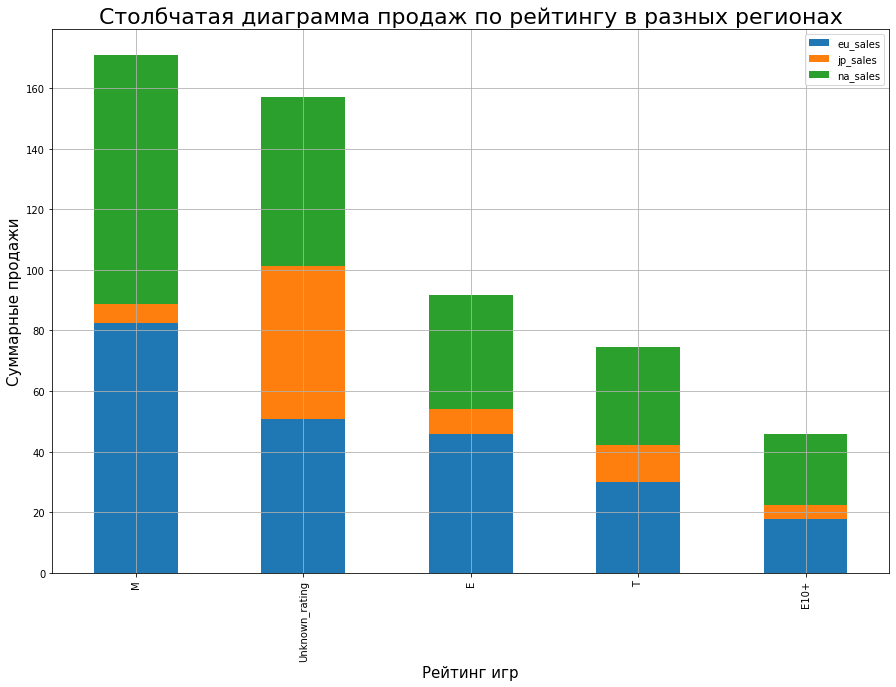

In [57]:
table4.sort_values(by='eu_sales', ascending=False).plot(kind='bar', stacked= True, figsize=(15,10), grid= True)

plt.title('Столбчатая диаграмма продаж по рейтингу в разных регионах', fontsize=22)
plt.xlabel('Рейтинг игр',fontsize=15)
plt.ylabel('Суммарные продажи',fontsize=15)
plt.show()

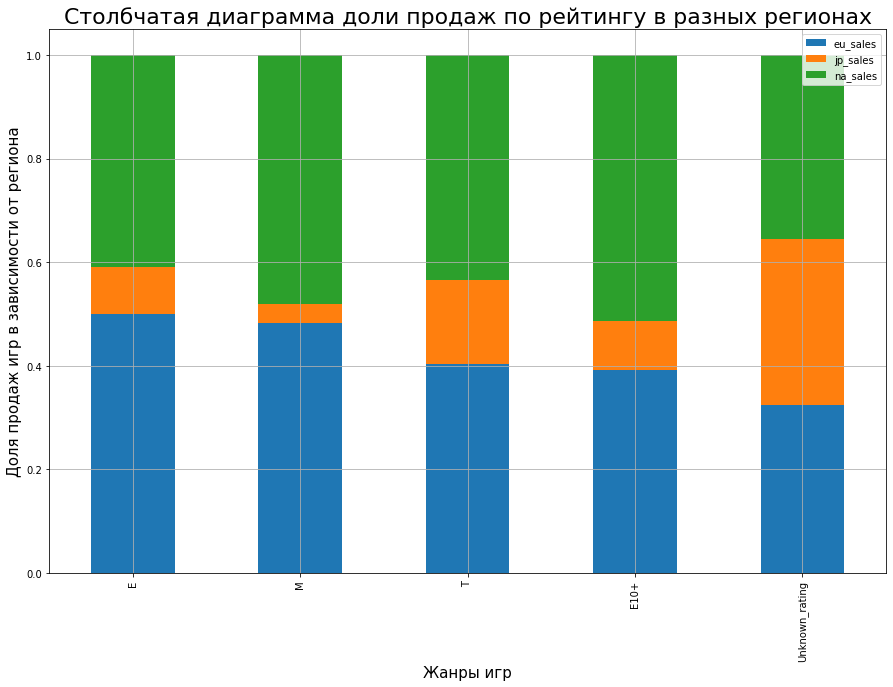

In [58]:
table4 = data_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
table4['total'] = table4['eu_sales'] + table4['jp_sales'] + table4['na_sales']

for reg in table4.columns:
    table4[reg] = table4[reg]/(table4['total'])

table4.drop('total', axis= 1 , inplace= True )
table4.sort_values(by='eu_sales', ascending=False).plot(kind='bar', stacked= True, figsize=(15,10), grid= True)

plt.title('Столбчатая диаграмма доли продаж по рейтингу в разных регионах', fontsize=22)
plt.xlabel('Жанры игр',fontsize=15)
plt.ylabel('Доля продаж игр в зависимости от региона',fontsize=15)
plt.show()

Найбольшим отклонением по доле среди регионов является рейтинг M. Хоть и игр с неизвестным рейтингом распределны равномерно по регионам, однако они занимают найбольшую часть среди всех игр в Японии. Возможно это связано с их популярной платформой 3DS или с особеностями региона.

Составим мини портреты пользователей для разных регионов:
- **Северная Америка** - пользователь PC/PS4/XOne играющий в Action и Shooter с рейтингом М
- **Европа** - пользователь PS4 играющий в Action и Shooter с рейтингом М
- **Япония** - пользователь 3DS играющий в RPG и Action и без возможность определить самый популярный рейтинг

Для всех регионов рейтинг E10+ самый "невостребованный"

### Шаг 5. Проверка гипотез

**Гипотеза 1** - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Поскольку данные выборки не взаимосвязаны и это сравнение двух выборок, то нам подойдет Двухвыборочный t-тест для независимых выборок. Построим гипотезы

Гипотеза H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны

Гипотеза H1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны

Поскольку мы не уточняем больше или меньше средние рейтинги, то это будет двухсторонняя гипотеза

In [59]:
sample1 = data_new[data_new['platform'] == 'XOne']['user_score'].dropna()
sample2 = data_new[data_new['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05

result = st.ttest_ind(sample1, sample2)

print('Среднее первой выборки', sample1.mean())
print('Среднее второй выборки', sample2.mean())
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Среднее первой выборки 6.594545454545456
Среднее второй выборки 6.298360655737705
p-значение: 0.10450507919348415
Не удалось отвергнуть нулевую гипотезу


Нам не удалось отвергнуть нулевую гипотезу, а значит, что можно сделать вывод об равенстве пользовательских рейтингов платформ Xbox One и PC.

**Гипотеза 2** - Средние пользовательские рейтинги жанров Action и Sports разные.

Поскольку данные выборки не взаимосвязаны и это сравнение двух выборок, то нам подойдет Двухвыборочный t-тест для независимых выборок. Построим гипотезы

Гипотеза H0 - Средние пользовательские рейтинги жанров Action и Sports равны

Гипотеза H1 - Средние пользовательские рейтинги жанров Action и Sports не равны

Поскольку мы не уточняем больше или меньше средние рейтинги, то это будет двухсторонняя гипотеза

In [60]:
sample3 = data_new[data_new['genre'] == 'Action']['user_score'].dropna()
sample4 = data_new[data_new['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05

result = st.ttest_ind(sample3, sample4)

print('Среднее первой выборки', sample3.mean())
print('Среднее второй выборки', sample4.mean())
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Среднее первой выборки 6.828163265306123
Среднее второй выборки 5.6360465116279075
p-значение: 1.281270205370119e-10
Отвергаем нулевую гипотезу


Нам удалось отвергнуть нулевую гипотезу, а это значит, что мы можем сделать вывод, что средние пользовательские рейтинги жанров Action и Sports не равны. При этом по средним показателям средние рейтинги жанра Action выше, чем у Sport

### Шаг 6: Вывод

В рамках данного исследования мы с вами посмотрели общую информацию о дата фрейме, проверили его на дубликаты, чтобы не искажать данные, частично удалили строки с неполными данными изменили типы столбцов.

В исследовательском анализе мы получили информацию о том что:
- Найбольшее количество игр выпускалось в период с 2002 по 2011 год
- Найбольшим периодом выпуска игр у платформ PC (32 года) и DS (29 лет)
- Среднее время выпуска игр на платформу, не PC, примерно 10 лет
- Новые поколения приставок выпускаются примерно раз в 5 лет, из-за чего происходит спад в количестве выпускаемых игр на предыдущей платформе
- Всего есть 6 платформ, игры на которые выпускали в 2016 году. При этом рост выпускаемых игр наблюдается у PS4 и XOne. PC стоит особняком от этих платформ из-за того, что она самая "древняя" и у нее нет разных поколений
- PS4 и XOne являются самыми прибыльными платформами для выпуска игр
- Рейтинг критиков сильнее влияет на продажи, чем рейтинг обычных пользователей

Мы составили мини портреты пользователей для разных регионов:

- Северная Америка - пользователь PC/PS4/XOne играющий в Action и Shooter с рейтингом М
- Европа - пользователь PS4 играющий в Action и Shooter с рейтингом М
- Япония - пользователь 3DS играющий в RPG и Action с неизветсным рейтингом

Также мы проверили 2 гипотезы и выяснили что:
- Средние пользовательские рейтинги платформ Xbox One и PC равны
- Средние пользовательские рейтинги жанров Action и Sports не равны

На основании данных можно сделать реккомендации на 2017 год:
- Следить за рейтингами критиков
- Следить за новинками PS4, XOne, PC
- Следить за появлением новых консолей, так как скоро будет 5 лет текущей версии PS4 и XOne, из-за чего может появится новая модель приставки
- Для Японии обращать внимание на 3DS
- Самые популярные жанры это - Action, Role-Playing, Shooter, Sports